In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, scale

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
apple = pd.read_csv('../data/transactions/Tech/AAPL.csv')  
google = pd.read_csv('../data/transactions/Tech/GOOG.csv')  
fb = pd.read_csv('../data/transactions/Tech/FB.csv')  
microsoft = pd.read_csv('../data/transactions/Tech/MSFT.csv')  
amazon = pd.read_csv('../data/transactions/Tech/AMZN.csv')  
print(apple.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2014-01-02  79.382858  79.575714  78.860001  79.018570  66.964325   
1  2014-01-03  78.980003  79.099998  77.204285  77.282860  65.493416   
2  2014-01-06  76.778572  78.114288  76.228569  77.704285  65.850533   
3  2014-01-07  77.760002  77.994286  76.845711  77.148575  65.379593   
4  2014-01-08  76.972855  77.937141  76.955711  77.637146  65.793633   

      Volume  
0   58671200  
1   98116900  
2  103152700  
3   79302300  
4   64632400  


In [63]:


def processData(data,result,input_unit,output_unit):
    X,Y = [],[]
    for i in range(len(data)-input_unit-output_unit):
        X.append(data[i:(i+input_unit)])
        temp = [result[j+i+input_unit] for j in range(output_unit)]
        Y.append(temp)
    return np.array(X),np.array(Y)

def getStock(stock):
    value = pd.Series(stock['Close']-stock['Close'].shift(1), index=stock.index) 
    value = value.bfill() 
    value[value>=0]=1
    value[value<0]=0 
    
    stock = stock.drop(['Date'],axis=1)
    stock=stock.astype('float64')
    CloseData = np.array(stock['Close'])
    return scale(stock), scale(CloseData),value


In [64]:
#model parameters
cell_unit = 50
learn_rate = 1e-3
decay_rate = 1e-6
train_epochs = 500

#input parameters
intput = apple
time_num = 10
output_num = 1
precentage = 0.75

In [68]:
#data,result = getStock(intput)
data,result,val = getStock(intput)
print(data[:10])
print(result[:10])
print(val[:10])
data,result = processData(data,result,time_num,output_num)
samples_num = data.shape[1]
features_num = data.shape[2]
print(data.shape)
print(result.shape)
n = len(data)
train_size = int(n*precentage)
data_train,data_test = data[0:train_size],data[train_size:]
result_train,result_test = result[0:train_size],result[train_size:]
print(data_train.shape)
print(result_train.shape)

[[-1.38570986 -1.39788315 -1.3824354  -1.3963611  -1.50066002  0.66773249]
 [-1.39647738 -1.41048265 -1.42712404 -1.44277139 -1.53808318  2.3410576 ]
 [-1.45531728 -1.4365895  -1.45345912 -1.43150312 -1.52899734  2.55468115]
 [-1.42908559 -1.43976779 -1.43680214 -1.44636197 -1.54097908  1.5429239 ]
 [-1.45012448 -1.44128129 -1.43383318 -1.43329831 -1.530445    0.92061242]
 [-1.41961623 -1.43636257 -1.44671149 -1.45980772 -1.55182122  1.13928406]
 [-1.44622986 -1.45929132 -1.46306    -1.47348257 -1.56284812  1.41318783]
 [-1.48410713 -1.45285912 -1.46780256 -1.46282527 -1.55425416  2.19285143]
 [-1.45237717 -1.4368544  -1.43780457 -1.42210635 -1.52141956  1.70573985]
 [-1.39395735 -1.38588906 -1.38382352 -1.38020339 -1.48763126  2.33226797]]
[-1.3963611  -1.44277139 -1.43150312 -1.44636197 -1.43329831 -1.45980772
 -1.47348257 -1.46282527 -1.42210635 -1.38020339]
0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
5    0.0
6    0.0
7    1.0
8    1.0
9    1.0
Name: Close, dtype: float64
(1247, 1

In [69]:
# print(data_train)
# print(result_train)

In [70]:
# basic model

model = Sequential() # most common
model.add(LSTM(cell_unit, input_shape = (time_num,features_num), activation = 'relu')) 
# model.add(Dropout(0.2))

# model.add(LSTM(cell_unit, activation = 'relu'))
# model.add(Dropout(0.2))

# model.add(Dense(time_steps, activation = 'relu'))
# model.add(Dropout(0.2))

model.add(Dense(1))

apt = tf.keras.optimizers.Adam(lr=learn_rate, decay=decay_rate)
model.compile(optimizer=apt, loss='mse') 
callback = EarlyStopping(monitor='val_loss', patience=10,verbose=1,mode='auto')


In [58]:
# basic mul layer model 

model = Sequential() # most common
model.add(LSTM(cell_unit, input_shape = (time_num,features_num), activation = 'relu')) 
model.add(Dropout(0.2))
model.add(LSTM(cell_unit, activation = 'relu',return_sequences = True))
model.add(Dropout(0.2))
model.add(Dense(time_num, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(output_num))

apt = tf.keras.optimizers.Adam(lr=learn_rate, decay=decay_rate)
model.compile(optimizer=apt, loss='mse') 
callback = EarlyStopping(monitor='loss', patience=10,verbose=1,mode='auto')

In [ ]:
# mul model 1

model = Sequential() # most common
model.add(LSTM(cell_unit, input_shape = (time_num,features_num),return_sequences = True, activation = 'relu')) 
model.add(Dropout(0.2))
model.add(LSTM(cell_unit, activation = 'relu',return_sequences = True))
model.add(Dropout(0.2))
model.add(Dense(time_num, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(output_num))

apt = tf.keras.optimizers.Adam(lr=learn_rate, decay=decay_rate)
model.compile(optimizer=apt, loss='mse') 
callback = EarlyStopping(monitor='loss', patience=10,verbose=1,mode='auto')

In [149]:
# basic model mul output

model = Sequential() # most common
model.add(LSTM(cell_unit, input_shape = (time_num,features_num), activation = 'relu')) 
# model.add(Dropout(0.2))

# model.add(LSTM(cell_unit, activation = 'relu'))
# model.add(Dropout(0.2))

# model.add(Dense(time_steps, activation = 'relu'))
# model.add(Dropout(0.2))

model.add(Dense(output_num))

apt = tf.keras.optimizers.Adam(lr=learn_rate, decay=decay_rate)
model.compile(optimizer=apt, loss='mse') 
callback = EarlyStopping(monitor='val_loss', patience=10,verbose=1,mode='auto')


In [31]:
# model 1

model = Sequential() # most common
model.add(LSTM(cell_unit, input_shape = (time_num,features_num), activation = 'relu')) 
model.add(Dropout(0.2))
model.add(Dense(1))

apt = tf.keras.optimizers.Adam(lr=learn_rate, decay=decay_rate)
model.compile(optimizer=apt, loss='mse') 
callback = EarlyStopping(monitor='loss', patience=10,verbose=1,mode='auto')

In [71]:
history = model.fit(data_train,result_train, epochs = train_epochs, validation_data=(data_test,result_test),shuffle=False,callbacks =[callback])

Train on 935 samples, validate on 312 samples
Epoch 1/500
935/935 [==============================] - 2s 2ms/step - loss: 0.4456 - val_loss: 2.1163
Epoch 2/500
935/935 [==============================] - 0s 442us/step - loss: 0.2528 - val_loss: 1.2213
Epoch 3/500
935/935 [==============================] - 0s 441us/step - loss: 0.0851 - val_loss: 0.2214
Epoch 4/500
935/935 [==============================] - 0s 461us/step - loss: 0.0117 - val_loss: 7.8362
Epoch 5/500
935/935 [==============================] - 0s 488us/step - loss: 0.0102 - val_loss: 2.1066
Epoch 6/500
935/935 [==============================] - 0s 447us/step - loss: 0.0098 - val_loss: 10.6620
Epoch 7/500
935/935 [==============================] - 0s 521us/step - loss: 0.0104 - val_loss: 1.2383
Epoch 8/500
935/935 [==============================] - 1s 601us/step - loss: 0.0082 - val_loss: 9.6622
Epoch 9/500
935/935 [==============================] - 0s 495us/step - loss: 0.0093 - val_loss: 1.2765
Epoch 10/500
935/935 [======

In [72]:
predictions = model.predict([data_test])
predictions = np.array(predictions)
real = result_test


In [83]:
pred = predictions-real
pred[pred>=0]=1
pred[pred<0]=0 
print(pred[:10])
print()

t = len(pred)
val = np.array(val)
test_val = val[train_size:]
countTrue = 0
for i in range(t):
    if pred[i][0] == test_val[i]:
        countTrue +=1
print(countTrue/t)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

0.5192307692307693


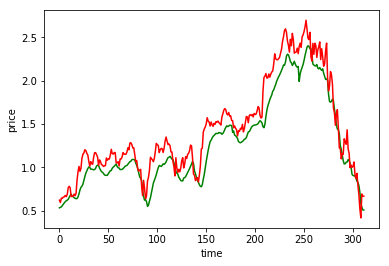

In [62]:
plt.plot(predictions,color='green')
plt.plot(real,color='red')
plt.ylabel("price")
plt.xlabel("time")

plt.show()



In [ ]:
# error
plt.plot((predictions-real)/(max(real)-min(real)),color='black')
plt.ylabel("error")
plt.xlabel("time")

plt.show()
print(real)